In [194]:
!pip install pyts

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from pyts.image import GramianAngularField

np.random.seed(123)
tf.random.set_seed(123)

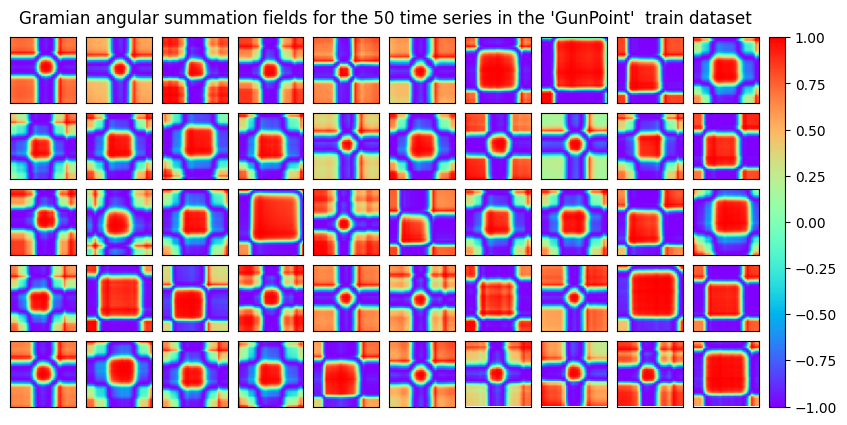

In [196]:
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

# Load the GunPoint dataset
X_train,X_test,X_label,Y_label= load_gunpoint(return_X_y=True)
# Get the Gramian angular summation fields for all the time series
gaf = GramianAngularField(image_size=32,method='summation')
X_gaf = gaf.fit_transform(X_train)
Y_gaf = gaf.transform(X_test)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(10, 5))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields for the 50 time series in the "
             "'GunPoint'  train dataset", y=0.92)

plt.show()

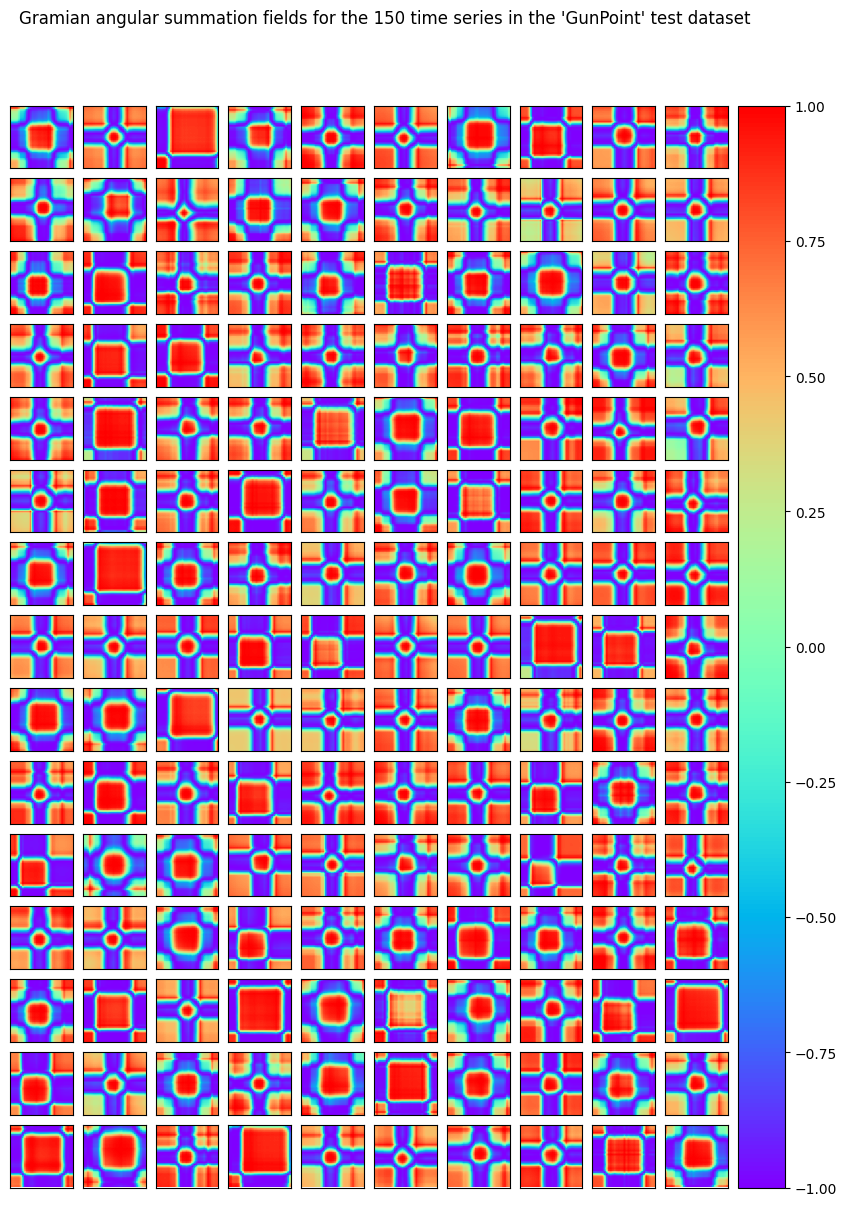

In [197]:
# Plot the 150 Gramian angular fields
fig = plt.figure(figsize=(10, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(15, 10), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(Y_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields for the 150 time series in the "
             "'GunPoint' test dataset", y=0.92)
plt.show()

In [198]:
X_gaf.shape,Y_gaf.shape,X_label.shape,Y_label.shape

((50, 32, 32), (150, 32, 32), (50,), (150,))

In [199]:
X_gaf = np.expand_dims(X_gaf, -1)
Y_gaf = np.expand_dims(Y_gaf, -1)
print(X_gaf.shape,Y_gaf.shape)

(50, 32, 32, 1) (150, 32, 32, 1)


In [200]:
X_label=X_label-1
Y_label=Y_label-1

In [201]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model

i = Input(shape = X_gaf[0].shape)
x = Conv2D(32,(3,3), activation='relu')(i)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64,(3,3), activation='relu')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(1)(x)

model = Model(i, x)

In [202]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
r = model.fit(X_gaf,X_label, validation_data=(Y_gaf,Y_label), epochs=50)

Epoch 1/50
2/2 [==============================] - 2s 480ms/step - loss: 0.5426 - accuracy: 0.4800 - val_loss: 0.2315 - val_accuracy: 0.5867
Epoch 2/50
2/2 [==============================] - 0s 229ms/step - loss: 0.2147 - accuracy: 0.7400 - val_loss: 0.2157 - val_accuracy: 0.6867
Epoch 3/50
2/2 [==============================] - 0s 222ms/step - loss: 0.1630 - accuracy: 0.8400 - val_loss: 0.1781 - val_accuracy: 0.7200
Epoch 4/50
2/2 [==============================] - 0s 126ms/step - loss: 0.1369 - accuracy: 0.8200 - val_loss: 0.1493 - val_accuracy: 0.7800
Epoch 5/50
2/2 [==============================] - 0s 113ms/step - loss: 0.0966 - accuracy: 0.9000 - val_loss: 0.1493 - val_accuracy: 0.7400
Epoch 6/50
2/2 [==============================] - 0s 197ms/step - loss: 0.0811 - accuracy: 0.8600 - val_loss: 0.1220 - val_accuracy: 0.8133
Epoch 7/50
2/2 [==============================] - 0s 116ms/step - loss: 0.0672 - accuracy: 0.9200 - val_loss: 0.1167 - val_accuracy: 0.8200
Epoch 8/50
2/2 [====

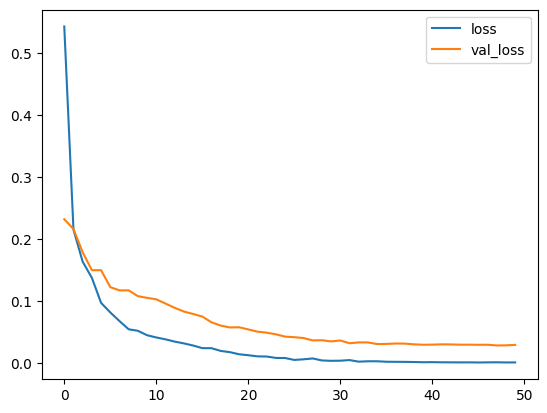

In [203]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

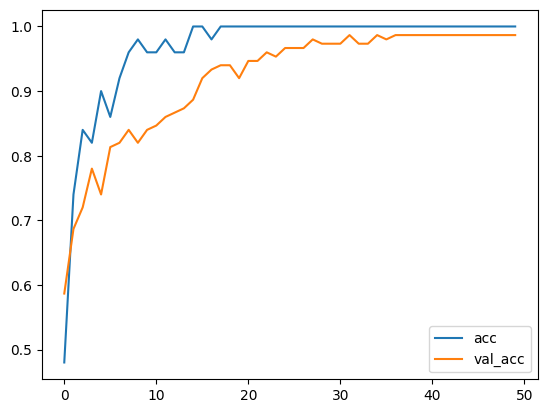

In [204]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()